# Задание №1. Тестовый пример + Задание №2.

Размерность данных: (100, 8)

Первые 5 записей:
   посещаемость  средний_балл_семестр  время_подготовки  \
0            98                   3.1                18   
1            88                   3.6                14   
2            74                   3.6                 7   
3            67                   4.3                11   
4            80                   4.1                16   

   количество_решенных_задач  стресс_уровень  часы_сна_перед_экзаменом  \
0                         75               8                         6   
1                         35               6                         4   
2                         66               7                         4   
3                         53               5                         4   
4                         75               6                         7   

   качество_конспекта  итоговый_балл  
0                   9            3.9  
1                   9            3.2  
2                   9            2.

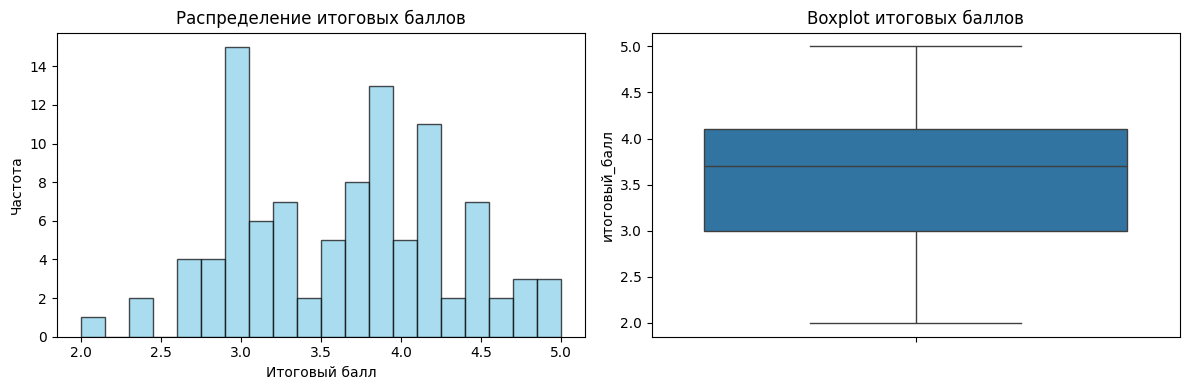

Подбор гиперпараметров
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Лучший R² score: 0.773
Результаты лучшей модели
Средняя абсолютная ошибка (MAE): 0.24
Среднеквадратичная ошибка (MSE): 0.08
Коэффициент детерминации (R²): 0.73


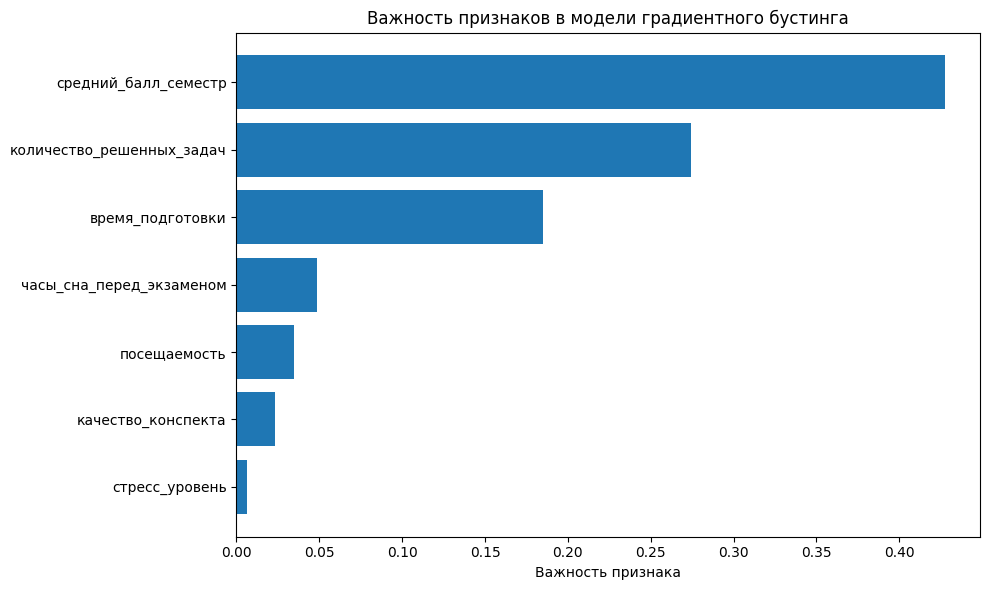

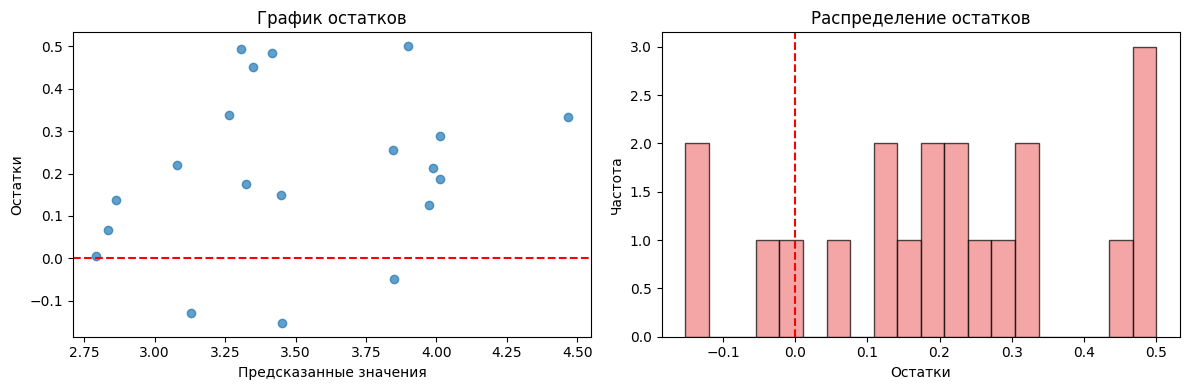


Введите данные для прогнозирования итогового балла:
Посещаемость (в %): 70
Средний_балл за семестр: 5
Время_подготовки (часов в неделю): 20
Количество решенных задач: 18
Уровень_стресса (1-10): 7
Часы_сна_перед_экзаменом: 8
Качество_конспекта (1-10): 8

Прогнозируемый итоговый балл: 4.50

Хотите сделать еще одно предсказание? (да/нет): нет
Программа завершена.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Загрузка данных
data = pd.read_csv('students_exam_results.csv')

print(f"Размерность данных: {data.shape}")
print(f"\nПервые 5 записей:")
print(data.head())

print(f"Статистическое описание:")
print(data.describe())

# Визуализация распределения целевой переменной
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(data['итоговый_балл'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Распределение итоговых баллов')
plt.xlabel('Итоговый балл')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['итоговый_балл'])
plt.title('Boxplot итоговых баллов')
plt.tight_layout()
plt.show()

# Разделение на признаки и целевую переменную
X = data.drop('итоговый_балл', axis=1)
y = data['итоговый_балл']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Подбор гиперпараметров с GridSearchCV
print("Подбор гиперпараметров")
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший R² score: {grid_search.best_score_:.3f}")

# Создание и обучение лучшей модели
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = best_model.predict(X_test)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Результаты лучшей модели")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

# Визуализация важности признаков
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Важность признака')
plt.title('Важность признаков в модели градиентного бустинга')
plt.tight_layout()
plt.show()

# График остатков
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Распределение остатков')

plt.tight_layout()
plt.show()

# Сохранение модели
joblib.dump(best_model, 'student_performance_model.pkl')

# Функция для предсказания результата нового ученика
def predict_student_result():
    print("\nВведите данные для прогнозирования итогового балла:")
    посещаемость = float(input("Посещаемость (в %): "))
    средний_балл = float(input("Средний_балл за семестр: "))
    время_подготовки = float(input("Время_подготовки (часов в неделю): "))
    количество_задач = int(input("Количество решенных задач: "))
    стресс = int(input("Уровень_стресса (1-10): "))
    сон = float(input("Часы_сна_перед_экзаменом: "))
    конспект = int(input("Качество_конспекта (1-10): "))

    new_student = pd.DataFrame({
        'посещаемость': [посещаемость],
        'средний_балл_семестр': [средний_балл],
        'время_подготовки': [время_подготовки],
        'количество_решенных_задач': [количество_задач],
        'стресс_уровень': [стресс],
        'часы_сна_перед_экзаменом': [сон],
        'качество_конспекта': [конспект]
    })

    loaded_model = joblib.load('student_performance_model.pkl')
    prediction = loaded_model.predict(new_student)[0]

    print(f"\nПрогнозируемый итоговый балл: {prediction:.2f}")
    return prediction

# Запуск функции предсказания
while True:
    predict_student_result()
    if input("\nХотите сделать еще одно предсказание? (да/нет): ").lower() != 'да':
        break

print("Программа завершена.")

# Задание №3. Самостоятельный пример.

EDA анализ
Размерность данных: (100, 6)
Первые 5 записей:
   посещаемость  средний_балл_семестр  время_разговора_в_неделю  \
0            82                    55                         6   
1            72                    65                         6   
2            84                    66                         8   
3            97                    61                         8   
4            71                    68                         0   

   время_прослушивания_в_неделю  мотивация_уровень  итоговый_балл  
0                             2                  3             34  
1                             3                  1             30  
2                             7                  5             37  
3                             6                  7             35  
4                             4                  6             45  
Статистическое описание:
       посещаемость  средний_балл_семестр  время_разговора_в_неделю  \
count    100.000000            100.

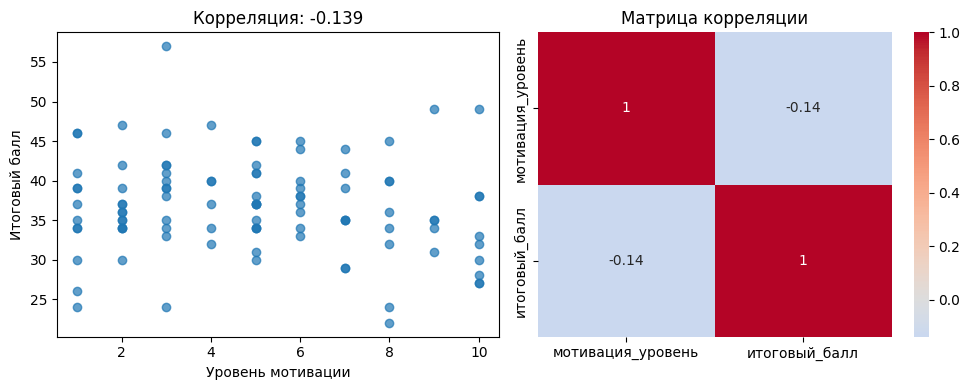

Результаты модели
Средняя абсолютная ошибка (MAE): 4.89
Коэффициент детерминации (R²): -0.09


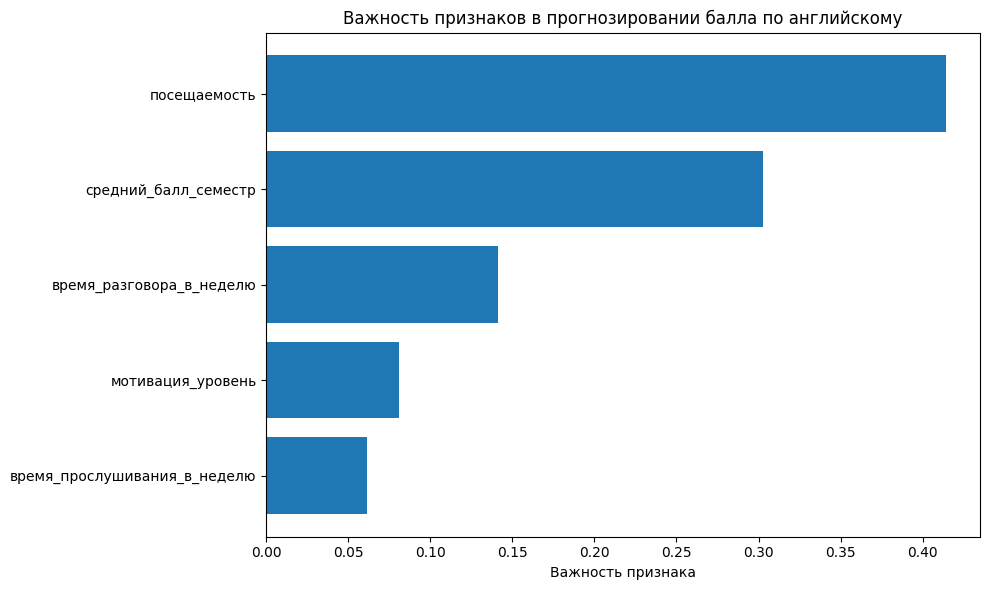

Влияние разговорной практики


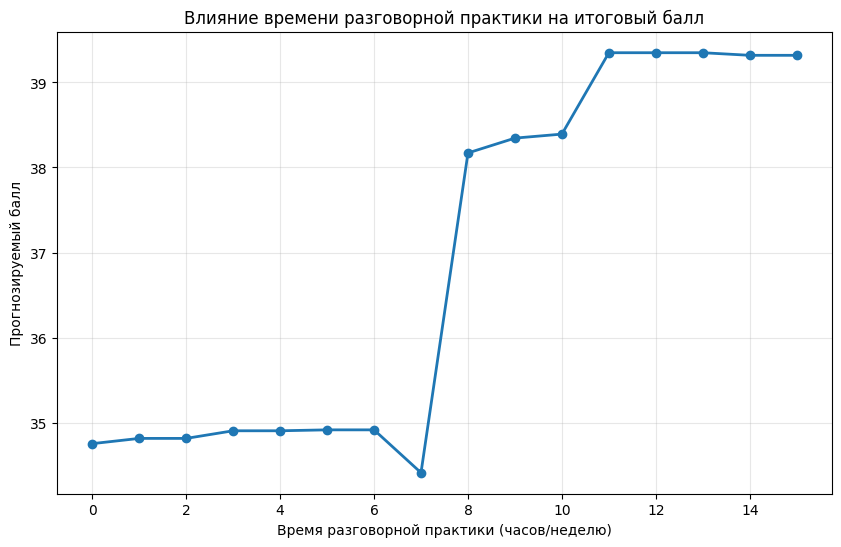

При увеличении времени разговорной практики прогнозируемый балл изменяется:
  1 ч: 34.8 баллов (+0.1)
  2 ч: 34.8 баллов (+0.0)
  3 ч: 34.9 баллов (+0.1)
  4 ч: 34.9 баллов (+0.0)
  5 ч: 34.9 баллов (+0.0)
  6 ч: 34.9 баллов (+0.0)
  7 ч: 34.4 баллов (-0.5)
  8 ч: 38.2 баллов (+3.8)
  9 ч: 38.3 баллов (+0.2)
  10 ч: 38.4 баллов (+0.0)
  11 ч: 39.3 баллов (+1.0)
  12 ч: 39.3 баллов (+0.0)
  13 ч: 39.3 баллов (+0.0)
  14 ч: 39.3 баллов (-0.0)
  15 ч: 39.3 баллов (+0.0)
Матрица корреляций всех признаков


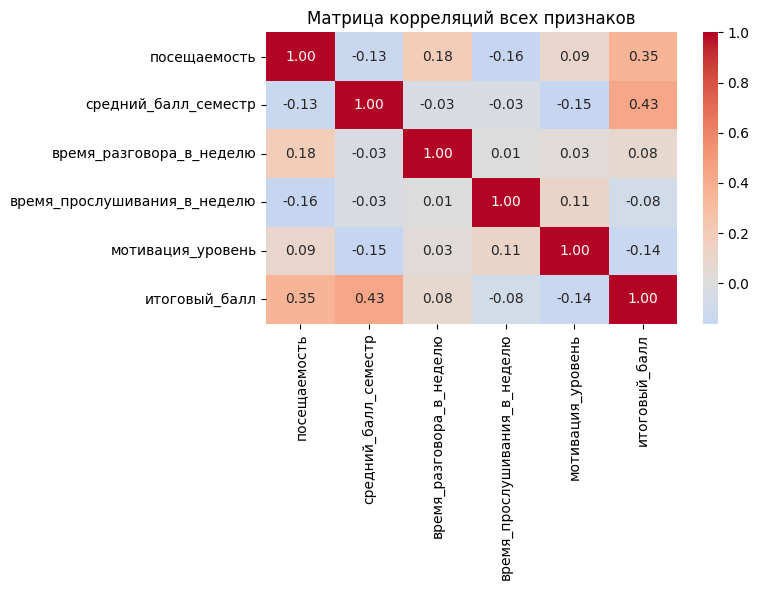

Прогноз результата по английскому языку
Введите данные ученика:
Посещаемость (%): 70
Средний балл за семестр: 70
Время разговорной практики (часов/неделю): 20
Время прослушивания (часов/неделю): 18
Уровень мотивации (1-10): 9

----------------------------------------
Результат прогноза: 
Прогнозируемый балл на экзамене: 41.2
Оценка: Хорошо
----------------------------------------
Хотите сделать еще один прогноз? (да/нет): нет
Программа завершена.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('english_exam_data.csv')

print("EDA анализ")
print(f"Размерность данных: {data.shape}")
print(f"Первые 5 записей:")
print(data.head())

print(f"Статистическое описание:")
print(data.describe())

print(f"Корелляция мотивации и итогового балла")
correlation = data['мотивация_уровень'].corr(data['итоговый_балл'])
print(f"Корреляция Пирсона: {correlation:.3f}")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(data['мотивация_уровень'], data['итоговый_балл'], alpha=0.7)
plt.xlabel('Уровень мотивации')
plt.ylabel('Итоговый балл')
plt.title(f'Корреляция: {correlation:.3f}')

plt.subplot(1, 2, 2)
sns.heatmap(data[['мотивация_уровень', 'итоговый_балл']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

X = data.drop('итоговый_балл', axis=1)
y = data['итоговый_балл']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Результаты модели")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

feature_importance = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel('Важность признака')
plt.title('Важность признаков в прогнозировании балла по английскому')
plt.tight_layout()
plt.show()

print(f"Влияние разговорной практики")

avg_student = X.mean().to_dict()

talk_times = np.arange(0, 16, 1)
predictions = []

for talk_time in talk_times:
    test_student = avg_student.copy()
    test_student['время_разговора_в_неделю'] = talk_time
    prediction = model.predict(pd.DataFrame([test_student]))[0]
    predictions.append(prediction)

plt.figure(figsize=(10, 6))
plt.plot(talk_times, predictions, marker='o', linewidth=2)
plt.xlabel('Время разговорной практики (часов/неделю)')
plt.ylabel('Прогнозируемый балл')
plt.title('Влияние времени разговорной практики на итоговый балл')
plt.grid(True, alpha=0.3)
plt.show()

print("При увеличении времени разговорной практики прогнозируемый балл изменяется:")
for i, (time, pred) in enumerate(zip(talk_times, predictions)):
    if i > 0:
        change = pred - predictions[i-1]
        print(f"  {time} ч: {pred:.1f} баллов ({change:+.1f})")

def predict_english_score():
    print("" + "="*50)
    print("Прогноз результата по английскому языку")
    print("="*50)

    try:
        print("Введите данные ученика:")
        посещаемость = float(input("Посещаемость (%): "))
        средний_балл = float(input("Средний балл за семестр: "))
        время_разговора = float(input("Время разговорной практики (часов/неделю): "))
        время_прослушивания = float(input("Время прослушивания (часов/неделю): "))
        мотивация = int(input("Уровень мотивации (1-10): "))

        new_student = pd.DataFrame({
            'посещаемость': [посещаемость],
            'средний_балл_семестр': [средний_балл],
            'время_разговора_в_неделю': [время_разговора],
            'время_прослушивания_в_неделю': [время_прослушивания],
            'мотивация_уровень': [мотивация]
        })

        prediction = model.predict(new_student)[0]

        print(f"\n" + "-"*40)
        print("Результат прогноза: ")
        print(f"Прогнозируемый балл на экзамене: {prediction:.1f}")

        if prediction >= 45:
            status = "Отлично"
        elif prediction >= 35:
            status = "Хорошо"
        elif prediction >= 25:
            status = "Удовлетворительно"
        else:
            status = "Неудовлетворительно"

        print(f"Оценка: {status}")
        print("-"*40)

    except ValueError as e:
        print(f"Ошибка ввода: {e}")
    except Exception as e:
        print(f"Ошибка прогноза: {e}")

print(f"Матрица корреляций всех признаков")
plt.figure(figsize=(8, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций всех признаков')
plt.tight_layout()
plt.show()

predict_english_score()

while True:
    continue_pred = input("Хотите сделать еще один прогноз? (да/нет): ").lower()
    if continue_pred in ['да', 'д', 'yes', 'y']:
        predict_english_score()
    else:
        print("Программа завершена.")
        break